### File Description

This file is responsible for presenting the graphs and thus verifying and analyzing the results of the trained models. The main function of this file is to provide a clear visualization of the models' performance in terms of forecasting and accuracy. 

This file facilitates the analysis of results, making it easier to interpret and compare the trained models.


### Imports

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import matplotlib.dates as mdates
import ast

### Analyzing raw data

In [18]:
df_raw_data = pd.read_csv("database/combined_data.csv", sep=';')

In [19]:
filtered_products = ['etanolhidratado', 'gasolinac', 'glp', 'oleodiesel', 'querosenedeaviacao']
df_filtered = df_raw_data[(df_raw_data['product'].isin(filtered_products))]

In [20]:
statistics = df_filtered.groupby('product')['m3'].agg(
    min='min', 
    max='max', 
    mean='mean', 
    std='std'
)

print(statistics)

                           min           max           mean            std
product                                                                   
etanolhidratado       0.000000  1.077622e+06   34304.618694  101520.798647
gasolinac             5.000000  1.035389e+06   87858.227567  134453.059672
glp                 356.226449  3.369416e+05   37292.707901   52741.761740
oleodiesel          478.400000  1.312177e+06  135535.235972  183412.660135
querosenedeaviacao    0.000000  3.711453e+05   15847.039397   39806.093694


In [21]:
filtered_products = ['etanolhidratado', 'gasolinac', 'glp', 'oleodiesel', 'querosenedeaviacao']
df_sp = df_raw_data[(df_raw_data['state'] == 'sp') & (df_raw_data['product'].isin(filtered_products))]

In [22]:
substituicoes = {
    'etanolhidratado': 'Etanol Hidratado',
    'gasolinac': 'Gasolina Comum',
    'glp': 'GLP',
    'oleodiesel': 'Óleo Diesel',
    'querosenedeaviacao': 'Querosene de Aviação'
}

df_sp['product'] = df_sp['product'].replace(substituicoes)

/tmp/ipykernel_140087/3857495774.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['product'] = df_sp['product'].replace(substituicoes)


datetime64[ns]


/tmp/ipykernel_140087/4115257494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp['timestamp'] = pd.to_datetime(df_sp['timestamp'], errors='coerce')


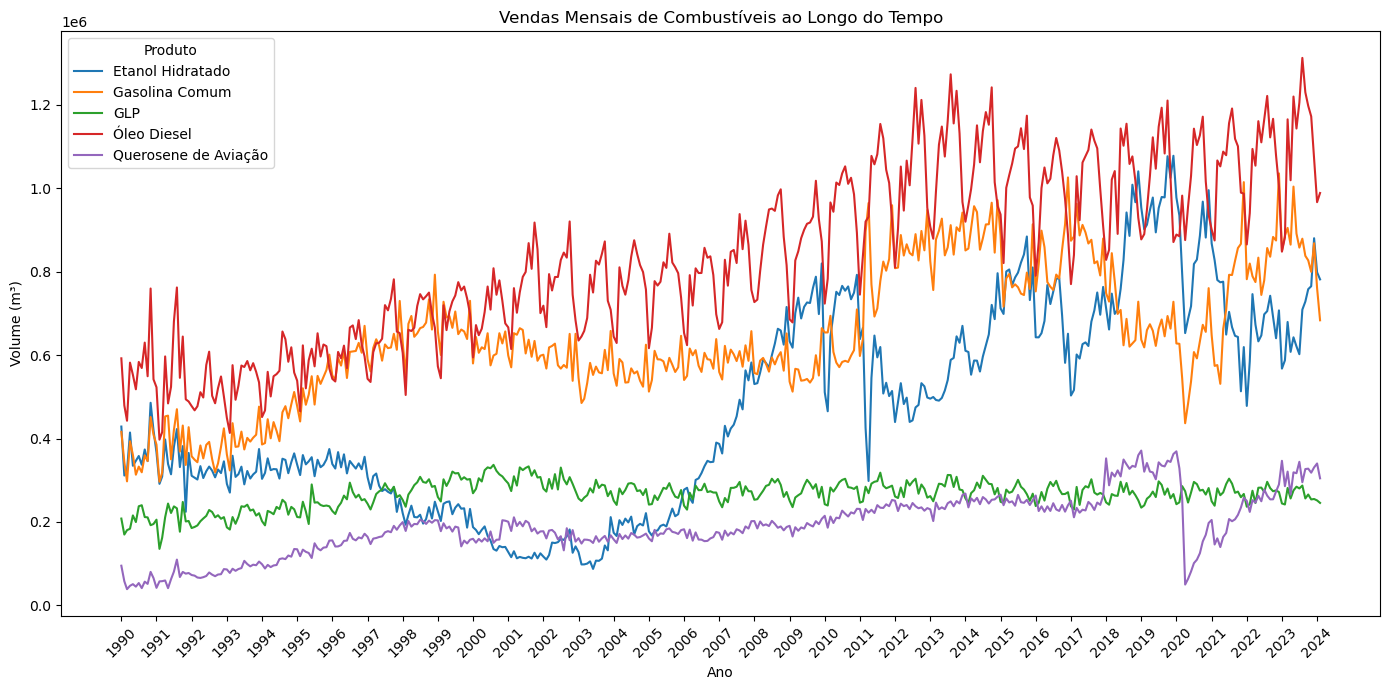

In [23]:
df_sp['timestamp'] = pd.to_datetime(df_sp['timestamp'], errors='coerce') 

print(df_sp['timestamp'].dtypes)

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_sp, x='timestamp', y='m3', hue='product')

plt.title('Vendas Mensais de Combustíveis ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Volume (m³)')

unique_years = df_sp['timestamp'].dt.year.dropna().unique() 
plt.xticks(ticks=[pd.Timestamp(f'{year}-01-01') for year in unique_years], labels=unique_years, rotation=45)

plt.legend(title='Produto')
plt.tight_layout() 
plt.show()

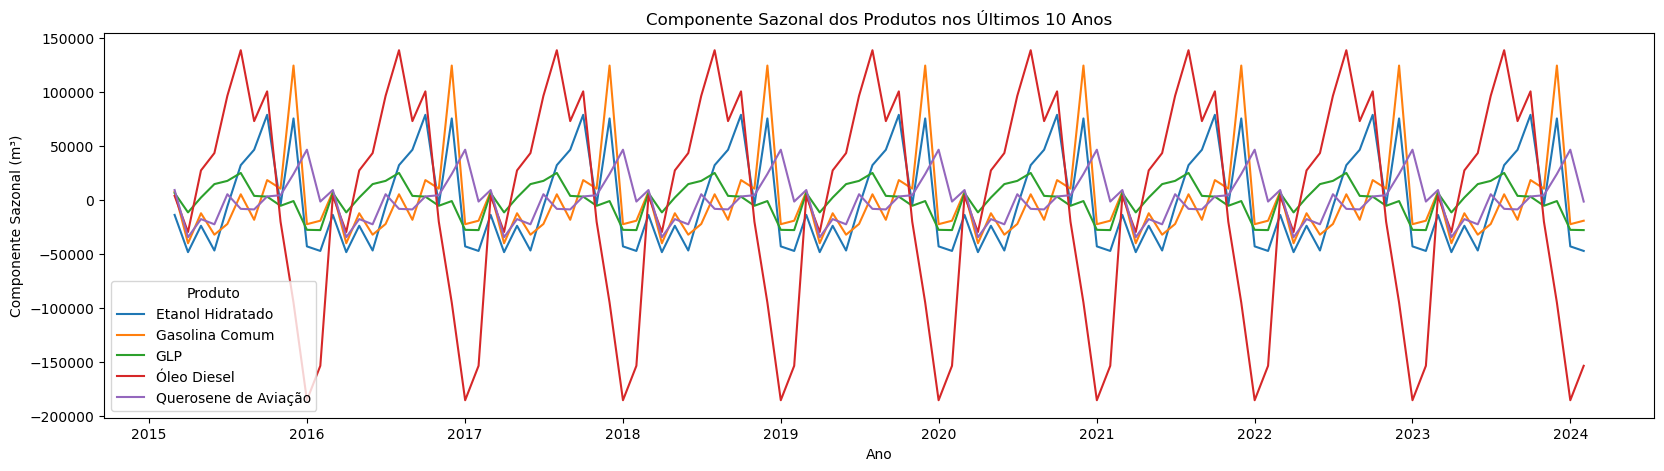

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_filtered = df_sp[df_sp['timestamp'] >= pd.Timestamp.now() - pd.DateOffset(years=10)]

def decompose_and_plot(product_data):
    result = seasonal_decompose(product_data['m3'], model='additive', period=12)
    seasonal = result.seasonal
    return seasonal

seasonal_components = pd.DataFrame()

for product in df_filtered['product'].unique():
    product_data = df_filtered[df_filtered['product'] == product].set_index('timestamp')
    seasonal = decompose_and_plot(product_data)
    seasonal_components[product] = seasonal

seasonal_components.reset_index(inplace=True)
seasonal_components.rename(columns={'index': 'timestamp'}, inplace=True)

plt.figure(figsize=(20, 5))
sns.lineplot(data=seasonal_components.melt(id_vars='timestamp', var_name='product', value_name='seasonal'),
             x='timestamp', y='seasonal', hue='product')
plt.title('Componente Sazonal dos Produtos nos Últimos 10 Anos')
plt.xlabel('Ano')
plt.ylabel('Componente Sazonal (m³)')
plt.legend(title='Produto')
plt.show()

### Loading data

In [25]:
# # INFO: LAST YEAR

# df_lstm = pd.read_excel("results_models/results_last_year/lstm_results_pytorch.xlsx") 
# df_oraculo = pd.read_excel("results_models/other_best_results/00-RANKING.xlsx")
# df_prophet = pd.read_csv("results_models/results_last_year/Prophet_12_output.csv", header=None)
# df_lag_llama = pd.read_csv("results_models/results_last_year/LagLlama_output.csv", sep=',')
# df_hibrido = pd.read_excel("results_models/results_last_year/hybrid_lstm_lagllama.xlsx") 
# df_hibrido_time_moe = pd.read_excel("results_models/results_last_year/hybrid_time_moe_prophet.xlsx") 

# df_oraculo = df_oraculo.rename(columns={"UF": "STATE"})
# df_lag_llama['PREDICTIONS'] = df_lag_llama['PREDICTIONS'].apply(ast.literal_eval)


# # INFO: TIME_MOE

# df_time_moe = pd.read_excel("results_models/results_last_year/results_time_moe.xlsx") 

# df_time_moe_fine_tuning_raw_data = pd.read_excel("results_models/results_last_year/results_time_moe_fine_tuning_raw_data.xlsx") 
# df_time_moe_fine_tuning_normalizados = pd.read_excel("results_models/results_last_year/results_time_moe_fine_tuning_normalizados.xlsx") 
# df_time_moe_fine_tuning_direct = pd.read_excel("results_models/results_last_year/results_time_moe_fine_tuning_direct.xlsx") 
# df_time_moe_fine_tuning_multiples = pd.read_excel("results_models/results_last_year/results_time_moe_fine_tuning_multiples.xlsx") 
# df_new_fine_tuning = pd.read_excel("results_models/results_last_year/results_time_moe_fine_tuning_new.xlsx")  
# df_new_fine_tuning_200 = pd.read_excel("results_models/results_last_year/results_time_moe_fine_tuning_new2.xlsx")  

# df_fine_tuning_time_moe = pd.concat([df_new_fine_tuning, df_new_fine_tuning_200, df_time_moe_fine_tuning_raw_data, df_time_moe_fine_tuning_normalizados, df_time_moe_fine_tuning_direct, df_time_moe_fine_tuning_multiples], ignore_index=True)

# INFO: 5 YEARS

df_n_beats = pd.read_csv("results_models/results_5_years/plot_results_nbeats.csv")
df_lstm = pd.read_csv("results_models/results_5_years/plot_results_lstm.csv") 
df_morai_moe = pd.read_csv("results_models/results_5_years/plot_results_morai_moe.csv") 
df_time_moe = pd.read_csv("results_models/results_5_years/plot_results_timemoe.csv") 
df_times_fm = pd.read_csv("results_models/results_5_years/plot_results_times_fm.csv") 

df_combined_5_years = pd.concat([df_n_beats, df_lstm, df_morai_moe, df_time_moe, df_times_fm], ignore_index=True)

In [26]:
filtered_products = ['etanolhidratado', 'gasolinac', 'glp', 'oleodiesel', 'querosenedeaviacao']

In [27]:
# df_oraculo = df_oraculo[['PRODUCT', 'STATE', 'MAPE', 'POCID', 'PBE', 'MASE']]
# df_oraculo = df_oraculo[df_oraculo['PRODUCT'].isin(filtered_products)]
# df_oraculo['TYPE_PREDICTIONS'] = 'ORACULO'

# df_5anos_comp = df_5anos_comp[['PRODUCT', 'STATE', 'MAPE', 'POCID', 'PBE']]
# df_5anos_comp = df_5anos_comp[df_5anos_comp['PRODUCT'].isin(filtered_products)]                         
# df_5anos_comp['TYPE_PREDICTIONS'] = 'MELHORES RESULTADOS 5 ANOS (JONAS)'

df_combined_5_years = df_combined_5_years[['PRODUCT', 'STATE', 'TYPE_PREDICTIONS', 'MAPE', 'POCID', 'PBE', 'RRMSE']]
# df_combined_5_years = df_combined_5_years[df_combined_5_years['PRODUCT'].isin(filtered_products)]

### Mape

In [28]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# median_mape = df.groupby(['PRODUCT', 'TYPE_PREDICTIONS'])['MAPE'].median().reset_index()

# order_dict = {}
# best_median_dict = {}
# for product in df['PRODUCT'].unique():
#     product_median = median_mape[median_mape['PRODUCT'] == product].sort_values(by='MAPE')
#     order_dict[product] = product_median['TYPE_PREDICTIONS'].tolist()
#     best_median_dict[product] = product_median['MAPE'].min() 

# for product in df['PRODUCT'].unique():
#     plt.figure(figsize=(12, 10))
    
#     product_data = df[df['PRODUCT'] == product]

#     sns.boxplot(y='TYPE_PREDICTIONS', x='MAPE', data=product_data, 
#                 order=order_dict[product], showfliers=False, 
#                 palette="Set2", 
#                 width=0.5)
    
#     plt.title(f'Boxplot of MAPE for {product}')
#     plt.ylabel('Type Predictions')
#     plt.xlabel('MAPE')

#     plt.axvline(x=best_median_dict[product], color='red', linestyle='--', label='Melhor Mediana')

#     plt.legend(title='Data')
#     plt.show()


### Analysis of results for 5 years

/tmp/ipykernel_140087/1029674266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='TYPE_PREDICTIONS', x='RRMSE', data=product_data,


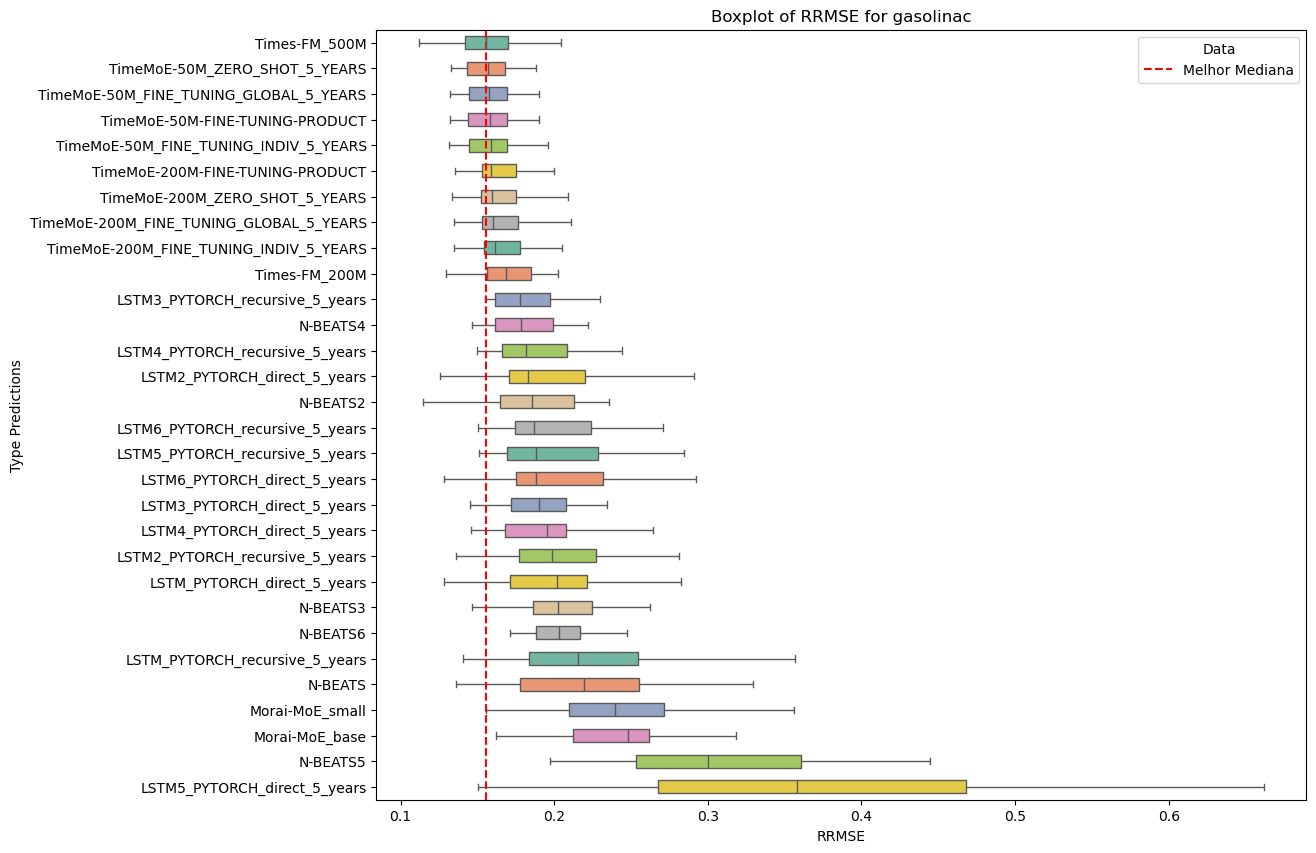

/tmp/ipykernel_140087/1029674266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='TYPE_PREDICTIONS', x='RRMSE', data=product_data,


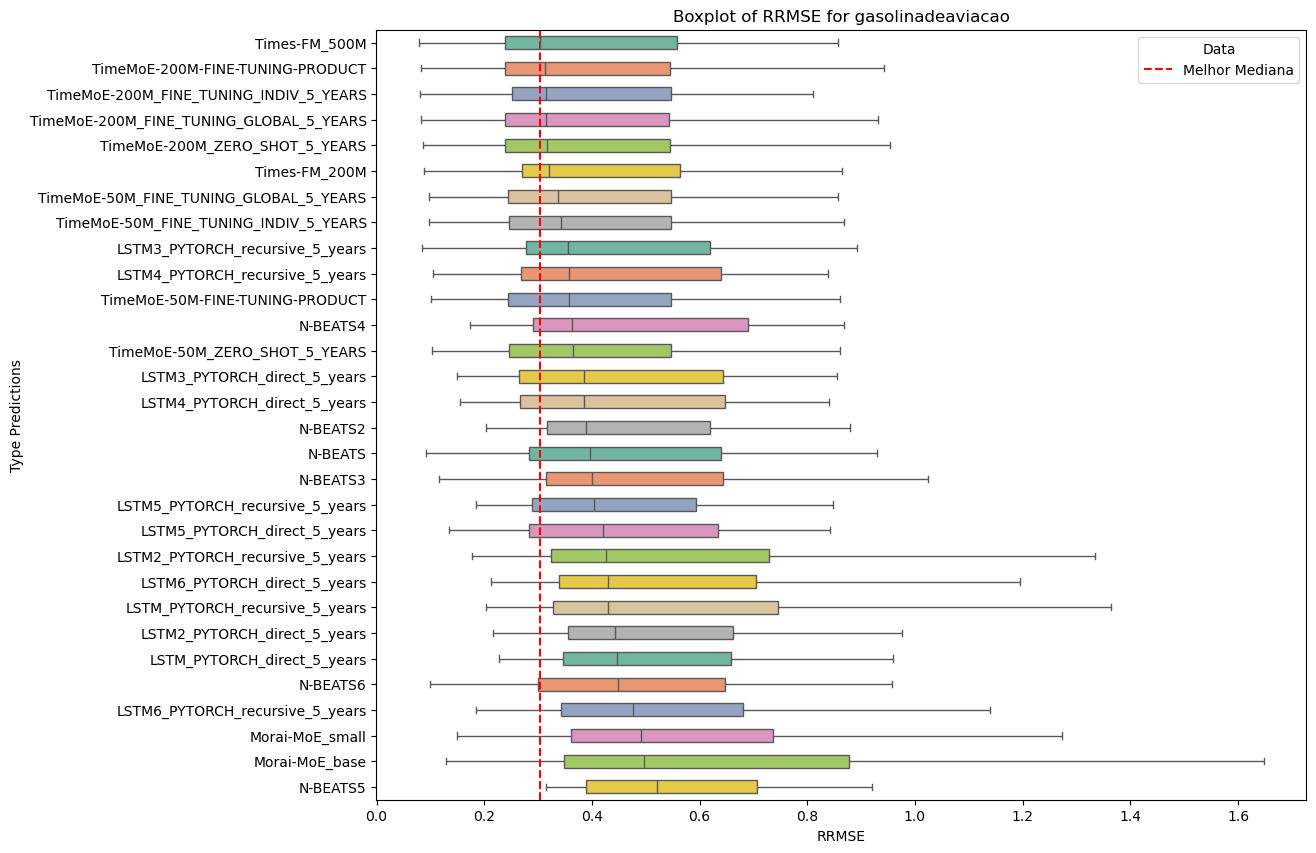

/tmp/ipykernel_140087/1029674266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='TYPE_PREDICTIONS', x='RRMSE', data=product_data,


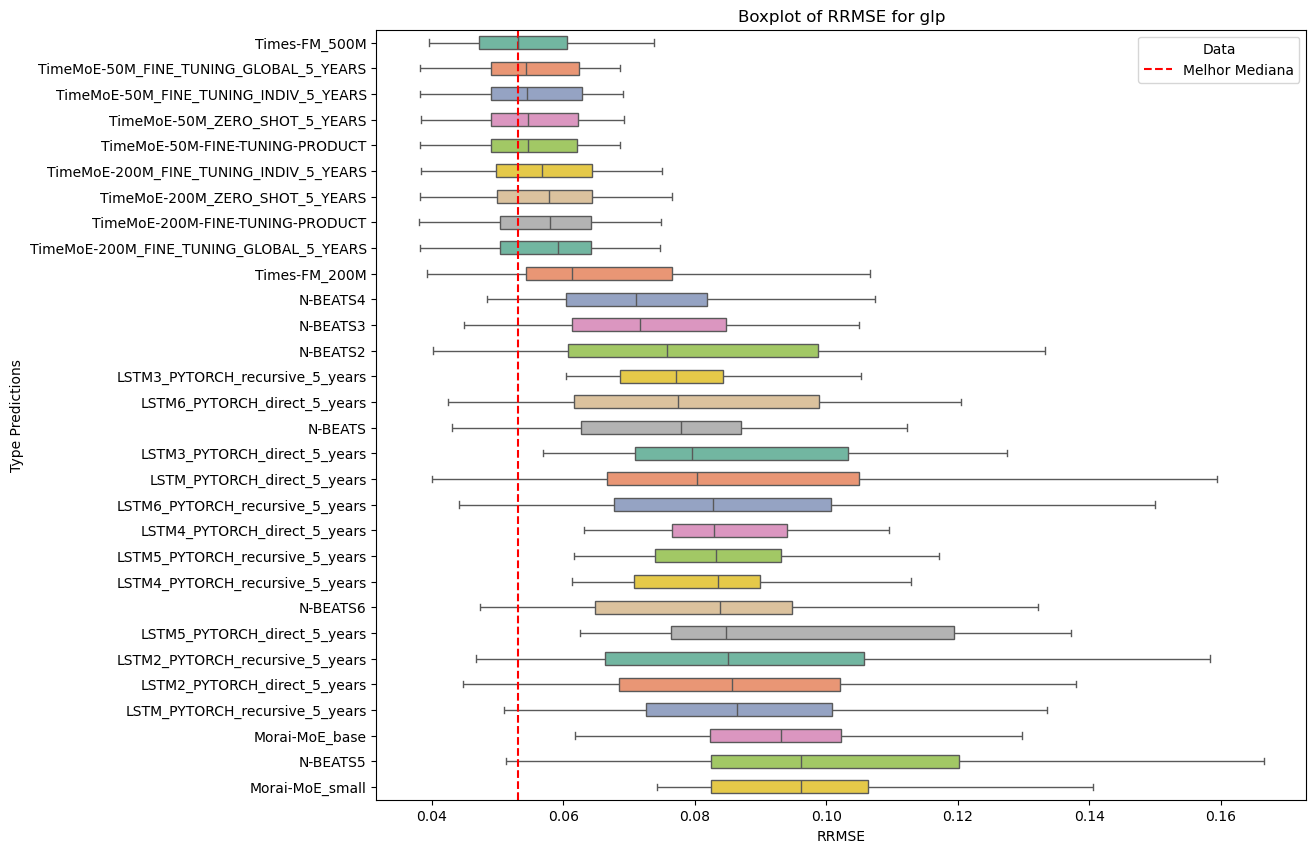

/tmp/ipykernel_140087/1029674266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='TYPE_PREDICTIONS', x='RRMSE', data=product_data,


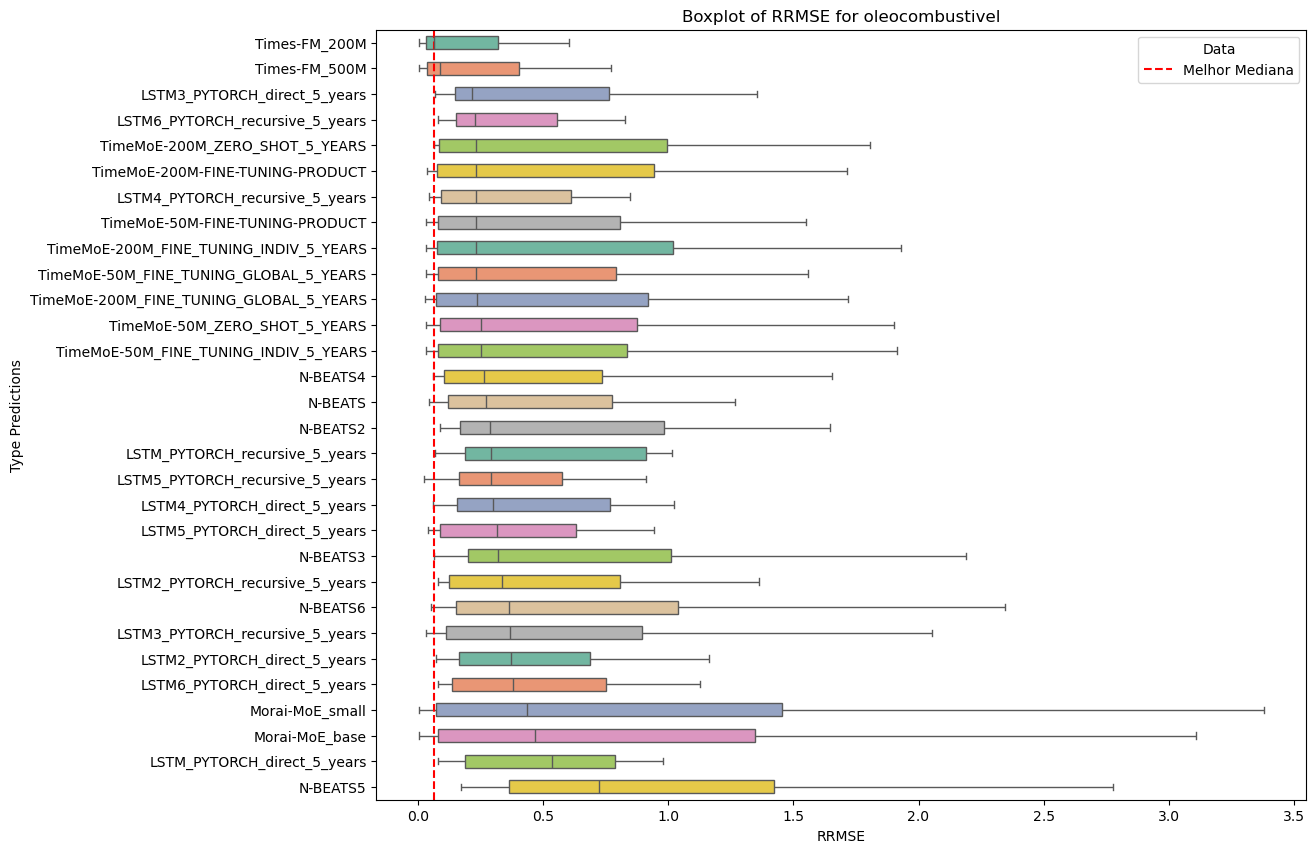

/tmp/ipykernel_140087/1029674266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='TYPE_PREDICTIONS', x='RRMSE', data=product_data,


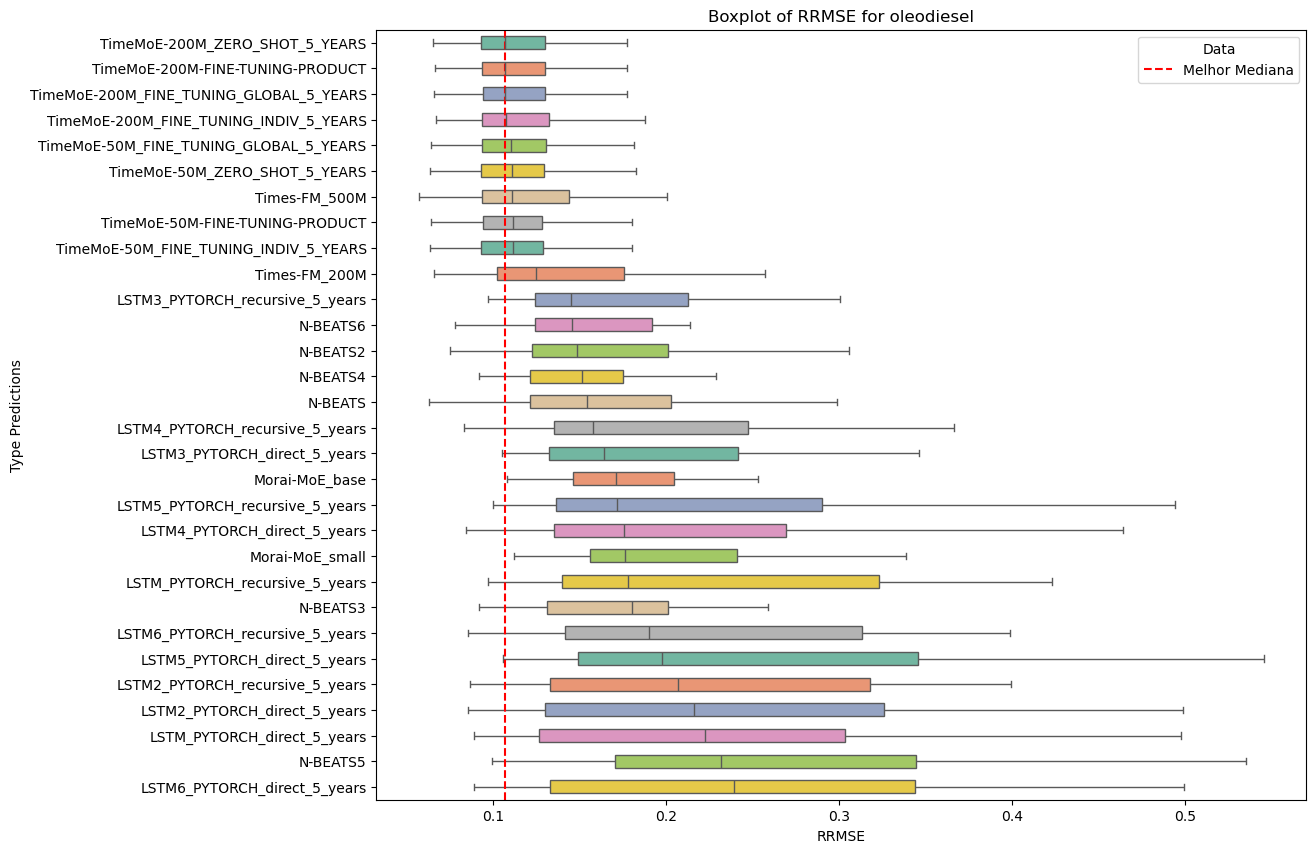

/tmp/ipykernel_140087/1029674266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='TYPE_PREDICTIONS', x='RRMSE', data=product_data,


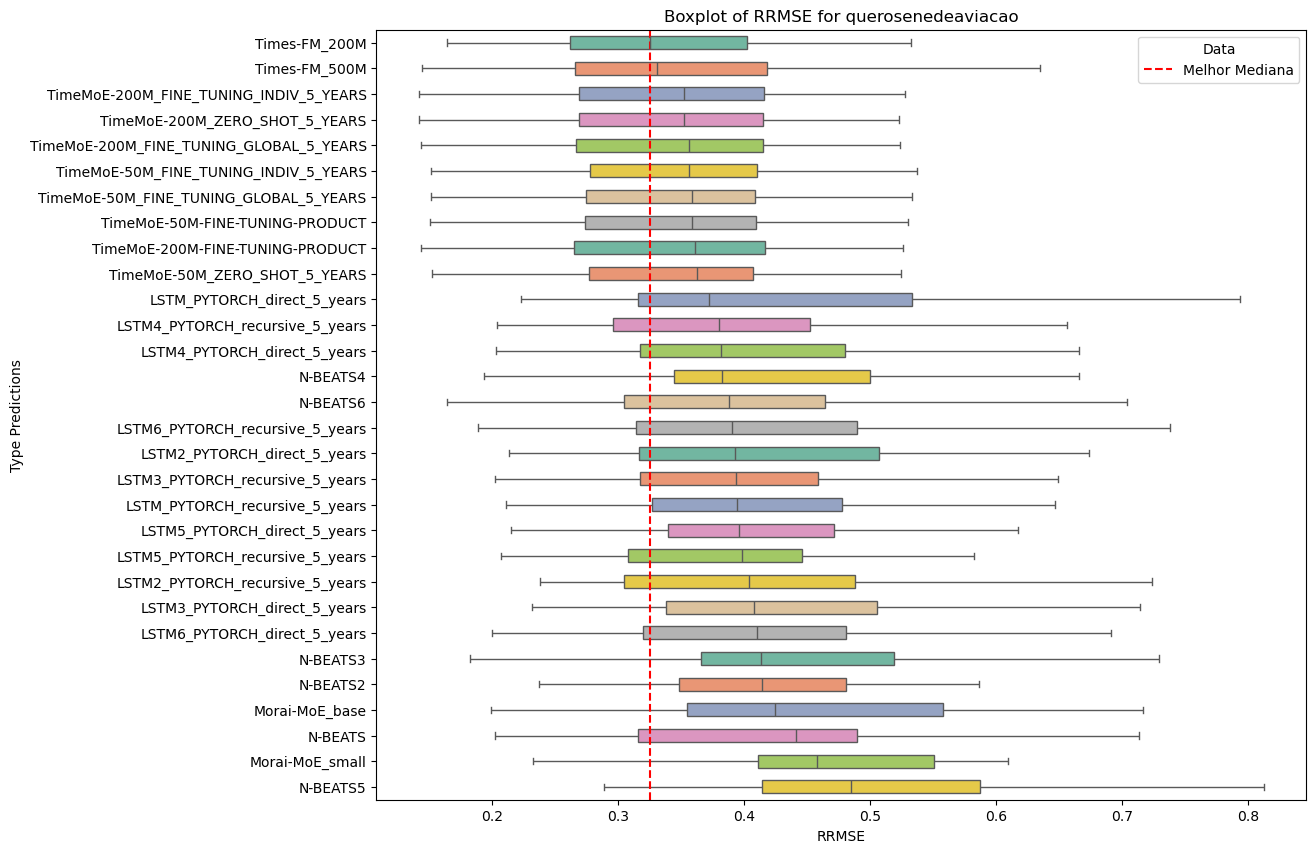

/tmp/ipykernel_140087/1029674266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='TYPE_PREDICTIONS', x='RRMSE', data=product_data,


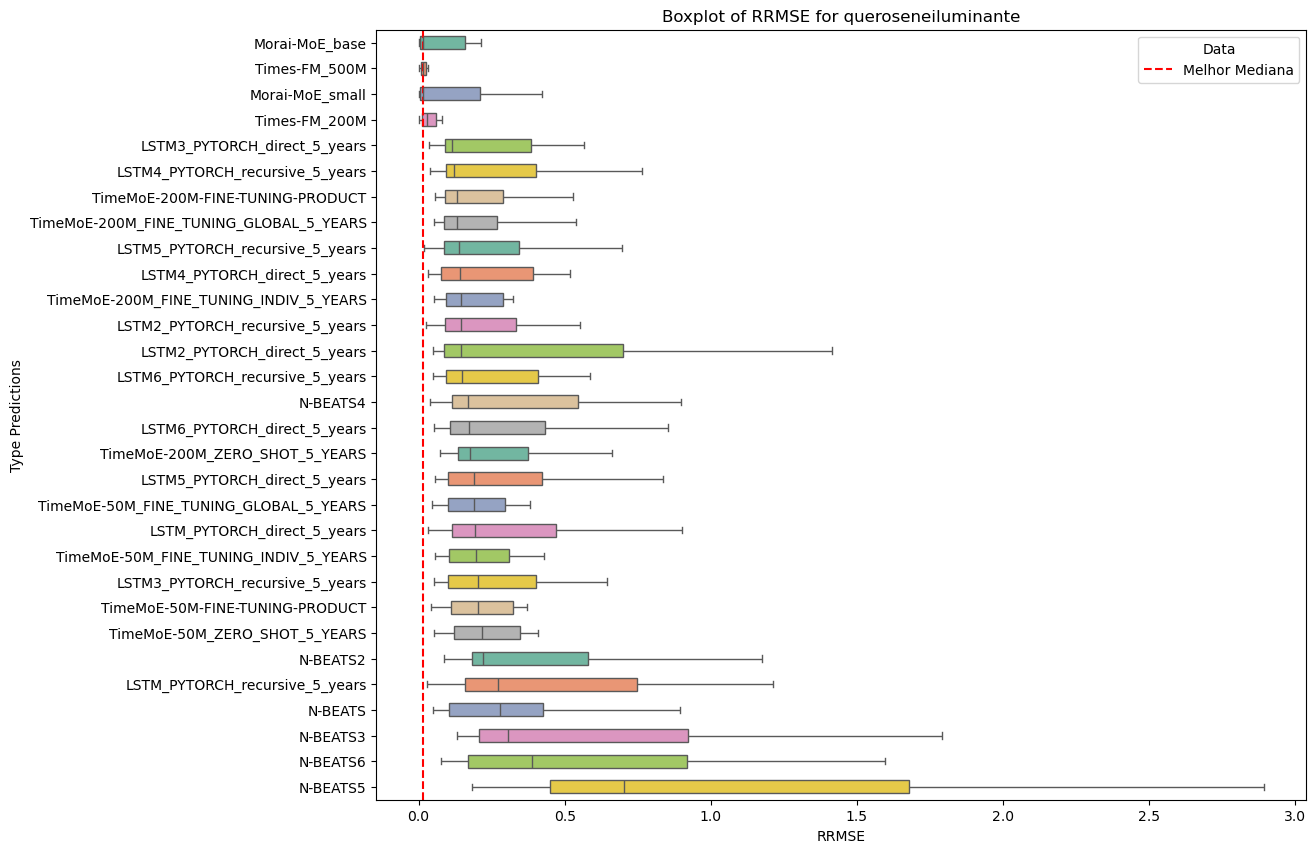

/tmp/ipykernel_140087/1029674266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='TYPE_PREDICTIONS', x='RRMSE', data=product_data,


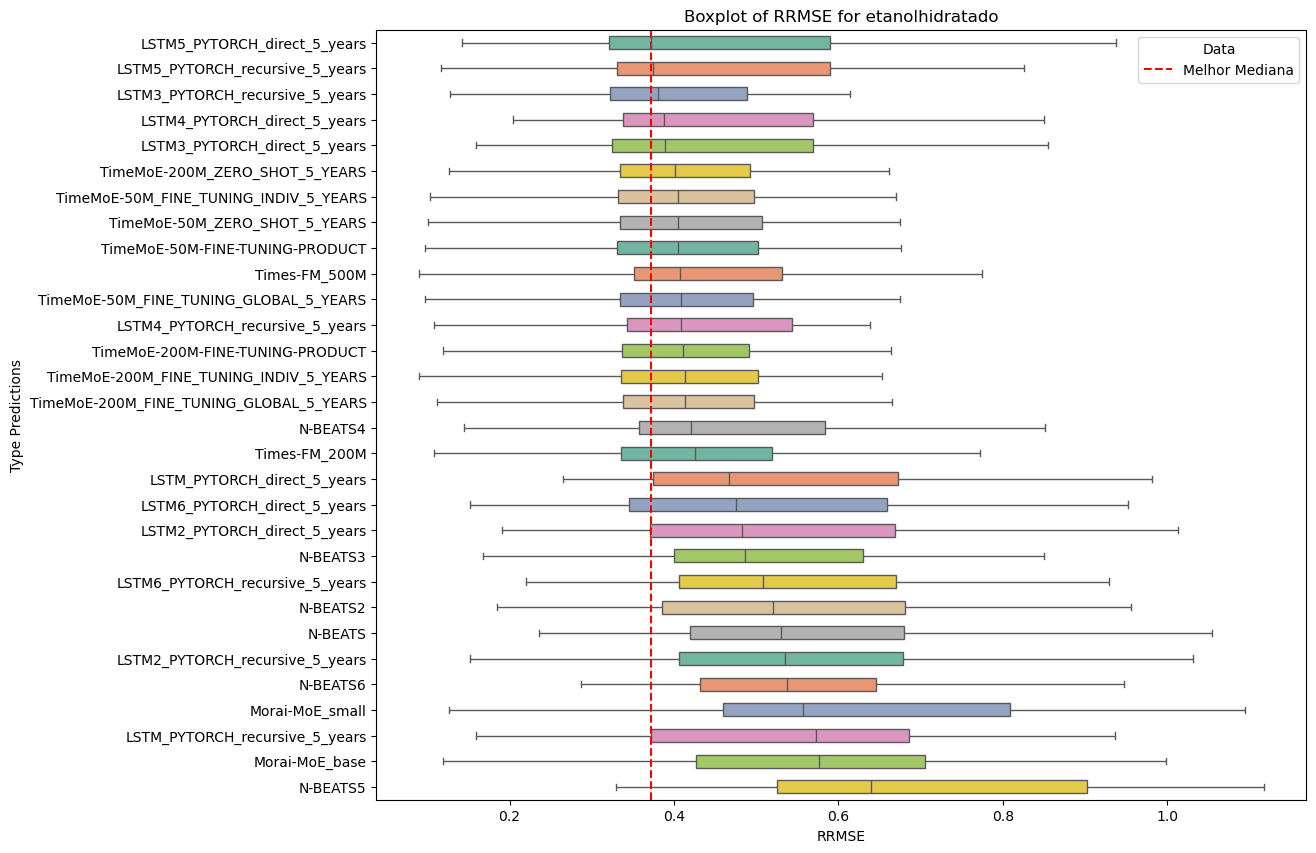

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

median_mape = df_combined_5_years.groupby(['PRODUCT', 'TYPE_PREDICTIONS'])['RRMSE'].median().reset_index()

order_dict = {}
best_median_dict = {}
for product in df_combined_5_years['PRODUCT'].unique():
    product_median = median_mape[median_mape['PRODUCT'] == product].sort_values(by='RRMSE')
    order_dict[product] = product_median['TYPE_PREDICTIONS'].tolist()
    best_median_dict[product] = product_median['RRMSE'].min()  


for product in df_combined_5_years['PRODUCT'].unique():
    plt.figure(figsize=(12, 10))

    product_data = df_combined_5_years[df_combined_5_years['PRODUCT'] == product]

    sns.boxplot(y='TYPE_PREDICTIONS', x='RRMSE', data=product_data, 
                order=order_dict[product], showfliers=False, 
                palette="Set2", 
                width=0.5)
    
    plt.title(f'Boxplot of RRMSE for {product}')
    plt.ylabel('Type Predictions')
    plt.xlabel('RRMSE')
    
    plt.axvline(x=best_median_dict[product], color='red', linestyle='--', label='Melhor Mediana')
    
    plt.legend(title='Data')
    plt.show()